In [756]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import seaborn as sns



In [757]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [758]:

downloaded = drive.CreateFile({'id':'1HjJVhAW5ShUhjP_Te_shHfwb1SL9_g3f'}) # replace the id with id of file you want to access
downloaded.GetContentFile('202007-capitalbikeshare-tripdata.csv')

downloaded = drive.CreateFile({'id':'1JrcFOpE8pt_cW3WSRgqcphraBCeB8DHT'}) # replace the id with id of file you want to access
downloaded.GetContentFile('202008-capitalbikeshare-tripdata.csv')

downloaded = drive.CreateFile({'id':'1zu983Np-KB-wr-yY7Eg0kiaiwrtSoeBq'}) # replace the id with id of file you want to access
downloaded.GetContentFile('202009-capitalbikeshare-tripdata.csv')

downloaded = drive.CreateFile({'id':'1-kL0EZFg0sBvQt22H3hnrEYu_zlo9gLy'}) # replace the id with id of file you want to access
downloaded.GetContentFile('202010-capitalbikeshare-tripdata.csv')

downloaded = drive.CreateFile({'id':'12LPyXWsaBkfdiz3DRvy0t21dMBOzdbNP'}) # replace the id with id of file you want to access
downloaded.GetContentFile('202011-capitalbikeshare-tripdata.csv')

downloaded = drive.CreateFile({'id':'1K1igSICfeeVjMjORyURLSpFRwHTJSX4U'}) # replace the id with id of file you want to access
downloaded.GetContentFile('202012-capitalbikeshare-tripdata.csv')

downloaded = drive.CreateFile({'id':'1sn8YS229HGrSo_88xXwjtHjeMJJZTm8M'}) # replace the id with id of file you want to access
downloaded.GetContentFile('TEMP_USA.csv')

In [759]:
#imporing capitalbikeshare-tripdata dataset
temp = pd.read_csv("TEMP_USA.csv") 
temp.head()

,LAT,LON,YEAR,MO,DY,PRECTOT,QV2M,RH2M,PS,T2M_RANGE,T2M_MAX,T2M_MIN,T2MDEW,T2M,WS50M_RANGE
0,38.88481,-77.00609,2015,1,1,0.00,2.62,71.46,101.16,9.12,5.11,-4.02,-4.87,-0.39,3.70
1,38.88481,-77.00609,2015,1,2,0.00,3.16,73.91,101.57,7.84,6.07,-1.76,-2.33,1.79,4.81
2,38.88481,-77.00609,2015,1,3,4.49,4.18,96.42,101.75,5.26,4.38,-0.87,1.35,2.02,1.49
3,38.88481,-77.00609,2015,1,4,10.86,7.35,98.24,100.28,11.12,14.93,3.81,8.88,9.66,6.29
4,38.88481,-77.00609,2015,1,5,0.00,2.34,61.61,101.63,9.17,5.02,-4.14,-6.45,0.15,7.72


In [760]:
station_status = pd.read_csv("https://raw.githubusercontent.com/Akanksha0215/mywork/master/station_status.csv") 
station_status.head()

,data__stations__is_installed,data__stations__num_bikes_disabled,data__stations__is_returning,data__stations__station_status,data__stations__last_reported,data__stations__eightd_has_available_keys,data__stations__legacy_id,data__stations__num_ebikes_available,data__stations__is_renting,data__stations__num_docks_disabled,data__stations__num_docks_available,data__stations__num_bikes_available,data__stations__station_id,last_updated,ttl
0,1,1,1,active,1599426428,False,1,0,1,0,11,3,1,1.599427e+09,5.0
1,1,1,1,active,1599421244,False,2,0,1,0,9,1,2,NaN,NaN
2,1,0,1,active,1599424089,False,3,0,1,0,1,16,3,NaN,NaN
3,1,0,1,active,1599426176,False,4,0,1,0,8,3,4,NaN,NaN
4,1,0,1,active,1599424516,False,5,0,1,0,7,4,5,NaN,NaN


In [761]:
#imporing capitalbikeshare-tripdata dataset
data1 = pd.read_csv("202008-capitalbikeshare-tripdata.csv") 
data1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,95D0E56BC37512F2,docked_bike,2020-08-26 20:07:36,2020-08-26 20:36:16,Army Navy Dr & S Joyce St,31006.0,N Lynn St & Fairfax Dr,31917.0,38.863700,-77.063300,38.893860,-77.070862,member
1,787142FE24DA497D,docked_bike,2020-08-02 17:54:57,2020-08-02 18:12:36,22nd & P ST NW,31285.0,14th & Upshur St NW,31406.0,38.909394,-77.048728,38.942475,-77.032678,member
2,BE6C2BFB2C0A6CD6,docked_bike,2020-08-11 18:55:15,2020-08-11 19:16:30,Prince George's Plaza Metro,32420.0,Queens Chapel & Hamilton St,32410.0,38.965742,-76.954803,38.954600,-76.959500,casual
3,7EEF58C1346E290C,docked_bike,2020-08-01 13:51:47,2020-08-01 14:09:52,Rhode Island & Connecticut Ave NW,31239.0,11th & Park Rd NW,31651.0,38.905995,-77.039802,38.931322,-77.028247,casual
4,61DE8A9F22D88C38,docked_bike,2020-08-21 19:31:56,2020-08-21 19:49:17,Market Square / King St & Royal St,31042.0,King St & Patrick St,31044.0,38.804718,-77.043363,38.805317,-77.049883,member


In [762]:
data1['rideable_type'] = [1 if b=='docked_bike' else 0 for b in data1.rideable_type	]
 
data1['rideable_type'].value_counts()

1    201992
0     49611
Name: rideable_type, dtype: int64

In [763]:
# Separate majority and minority classes
from sklearn.utils import resample

df_majority = data1[data1.rideable_type == 1]
df_minority = data1[data1.rideable_type==0]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=49611,     # to match minority class
                                 random_state=50) # reproducible results
 
# Combine minority class with downsampled majority class
data1_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
data1_downsampled.rideable_type.value_counts()

1    49611
0    49611
Name: rideable_type, dtype: int64

In [764]:
data1_downsampled['rideable_type'] = ['docked_bike' if b== 1 else 'electric_bike' for b in data1_downsampled.rideable_type	]
 
data1_downsampled['rideable_type'].value_counts()

docked_bike      49611
electric_bike    49611
Name: rideable_type, dtype: int64

In [765]:
#imporing capitalbikeshare-tripdata dataset
data2 = pd.read_csv("202009-capitalbikeshare-tripdata.csv") 
data2.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,02C8003EE103FB10,docked_bike,2020-09-18 17:28:03,2020-09-18 18:28:31,5th St & Massachusetts Ave NW,31265.0,5th St & Massachusetts Ave NW,31265.0,38.90093,-77.018677,38.90093,-77.018677,casual
1,B3CCC49A34A718DC,electric_bike,2020-09-29 18:41:26,2020-09-29 19:05:59,NaN,NaN,NaN,NaN,38.90000,-77.050000,38.90000,-76.980000,casual
2,8F6A634D2E73B432,electric_bike,2020-09-29 07:47:38,2020-09-29 08:01:04,NaN,NaN,NaN,NaN,38.90000,-76.980000,38.90000,-77.000000,casual
3,BCF6943D9FD02C9B,electric_bike,2020-09-29 19:50:38,2020-09-29 20:08:08,NaN,NaN,NaN,NaN,38.91000,-77.030000,38.90000,-77.000000,casual
4,D91499AB0FB94DCF,electric_bike,2020-09-28 20:36:51,2020-09-28 21:01:34,NaN,NaN,NaN,NaN,38.92000,-77.030000,38.90000,-77.000000,casual


In [766]:
data2['rideable_type'] = [1 if b=='docked_bike' else 0 for b in data2.rideable_type	]
 
data2['rideable_type'].value_counts()

1    194225
0     55674
Name: rideable_type, dtype: int64

In [767]:
# Separate majority and minority classes
from sklearn.utils import resample

df_majority = data2[data2.rideable_type == 1]
df_minority = data2[data2.rideable_type==0]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=55674,     # to match minority class
                                 random_state=50) # reproducible results
 
# Combine minority class with downsampled majority class
data2_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
data2_downsampled.rideable_type.value_counts()

1    55674
0    55674
Name: rideable_type, dtype: int64

In [768]:
data2_downsampled['rideable_type'] = ['docked_bike' if b== 1 else 'electric_bike' for b in data2_downsampled.rideable_type	]
 
data2_downsampled['rideable_type'].value_counts()

docked_bike      55674
electric_bike    55674
Name: rideable_type, dtype: int64

In [769]:
#imporing capitalbikeshare-tripdata dataset
data3 = pd.read_csv("202010-capitalbikeshare-tripdata.csv") 
data3.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5160990A29898496,electric_bike,2020-10-12 07:38:42,2020-10-12 07:52:38,NaN,NaN,NaN,NaN,38.81,-77.06,38.84000,-77.060000,casual
1,AB3EDB59F4D802E7,electric_bike,2020-10-02 17:58:30,2020-10-02 18:07:45,NaN,NaN,NaN,NaN,38.93,-77.00,38.91000,-77.000000,casual
2,238A92D9D011475D,electric_bike,2020-10-02 00:13:37,2020-10-02 00:21:10,NaN,NaN,NaN,NaN,38.91,-77.04,38.90000,-77.000000,casual
3,59D6EF767F57C139,electric_bike,2020-10-02 16:31:12,2020-10-02 16:42:50,NaN,NaN,NaN,NaN,38.92,-77.03,38.91000,-77.000000,casual
4,A94B93E9E864972A,electric_bike,2020-10-19 21:33:46,2020-10-19 21:43:55,NaN,NaN,14th & V St NW,31101.0,38.91,-77.04,38.91769,-77.031821,casual


In [770]:
data3['rideable_type'] = [1 if b=='docked_bike' else 0 for b in data3.rideable_type	]
 
data3['rideable_type'].value_counts()

1    180231
0     49601
Name: rideable_type, dtype: int64

In [771]:
# Separate majority and minority classes
from sklearn.utils import resample

df_majority = data3[data3.rideable_type == 1]
df_minority = data3[data3.rideable_type==0]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=49601,     # to match minority class
                                 random_state=50) # reproducible results
 
# Combine minority class with downsampled majority class
data3_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
data3_downsampled.rideable_type.value_counts()

1    49601
0    49601
Name: rideable_type, dtype: int64

In [772]:
data3_downsampled['rideable_type'] = ['docked_bike' if b== 1 else 'electric_bike' for b in data3_downsampled.rideable_type	]
 
data3_downsampled['rideable_type'].value_counts()

docked_bike      49601
electric_bike    49601
Name: rideable_type, dtype: int64

In [773]:
data4 = pd.read_csv("202007-capitalbikeshare-tripdata.csv") 
data4.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,40166AEE48DB264F,docked_bike,2020-07-10 20:00:46,2020-07-10 20:09:42,Potomac Ave & Half St SW,570.0,4th & M St SW,21.0,38.870201,-77.010836,38.87670,-77.017800,casual
1,C2D80D65DEB2C464,docked_bike,2020-07-30 22:11:33,2020-07-30 23:32:05,Maine Ave & 9th St SW,548.0,Maine Ave & 9th St SW,548.0,38.880440,-77.025236,38.88044,-77.025236,casual
2,FBE8E99BAAED0455,electric_bike,2020-07-22 09:47:52,2020-07-22 09:53:38,NaN,NaN,NaN,NaN,38.920000,-77.000000,38.92000,-77.010000,casual
3,E7950C376FD263E4,electric_bike,2020-07-22 10:36:55,2020-07-22 10:49:03,NaN,NaN,NaN,NaN,38.920000,-77.010000,38.92000,-77.000000,casual
4,0149F273572ED43F,electric_bike,2020-07-22 15:53:55,2020-07-22 15:58:47,NaN,NaN,NaN,NaN,38.910000,-77.050000,38.90000,-77.050000,casual


In [774]:
data4['rideable_type'] = [1 if b=='docked_bike' else 0 for b in data4.rideable_type	]
 
data4['rideable_type'].value_counts()

1    212516
0     15786
Name: rideable_type, dtype: int64

In [775]:
# Separate majority and minority classes
from sklearn.utils import resample

df_majority = data4[data4.rideable_type == 1]
df_minority = data4[data4.rideable_type==0]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=15786,     # to match minority class
                                 random_state=50) # reproducible results
 
# Combine minority class with downsampled majority class
data4_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
data4_downsampled.rideable_type.value_counts()

1    15786
0    15786
Name: rideable_type, dtype: int64

In [776]:
data4_downsampled['rideable_type'] = ['docked_bike' if b== 1 else 'electric_bike' for b in data4_downsampled.rideable_type	]
 
data4_downsampled['rideable_type'].value_counts()

docked_bike      15786
electric_bike    15786
Name: rideable_type, dtype: int64

In [777]:
data5 = pd.read_csv("202011-capitalbikeshare-tripdata.csv") 
data5.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EAF58AB55323A15E,docked_bike,2020-11-02 18:41:34,2020-11-02 18:49:04,17th & K St NW / Farragut Square,31233.0,15th & P St NW,31201.0,38.902061,-77.038322,38.909868,-77.034421,casual
1,DBD5BC10E1F0C019,docked_bike,2020-11-07 17:24:13,2020-11-07 17:24:48,New Jersey Ave & F St NW,31655.0,New Jersey Ave & F St NW,31655.0,38.897108,-77.011616,38.897108,-77.011616,member
2,64776A208DCED86D,docked_bike,2020-11-20 13:28:22,2020-11-20 14:19:26,Lincoln Memorial,31258.0,15th St & Constitution Ave NW,31321.0,38.888255,-77.049437,38.892244,-77.033234,casual
3,B870C5DC875CA903,docked_bike,2020-11-25 16:02:34,2020-11-25 16:31:31,Lincoln Memorial,31258.0,15th St & Constitution Ave NW,31321.0,38.888255,-77.049436,38.892244,-77.033234,casual
4,98DEA3EA1A85634F,docked_bike,2020-11-21 10:55:34,2020-11-21 11:12:45,Metro Center / 12th & G St NW,31230.0,2nd & G St NE,31639.0,38.898364,-77.027869,38.899670,-77.003666,casual


In [778]:
data5['rideable_type'] = [1 if b=='docked_bike' else 0 for b in data5.rideable_type	]
 
data5['rideable_type'].value_counts()

1    135343
0     40092
Name: rideable_type, dtype: int64

In [779]:
# Separate majority and minority classes
from sklearn.utils import resample

df_majority = data5[data5.rideable_type == 1]
df_minority = data5[data5.rideable_type==0]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=40092,     # to match minority class
                                 random_state=50) # reproducible results
 
# Combine minority class with downsampled majority class
data5_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
data5_downsampled.rideable_type.value_counts()

1    40092
0    40092
Name: rideable_type, dtype: int64

In [780]:
data5_downsampled['rideable_type'] = ['docked_bike' if b== 1 else 'electric_bike' for b in data5_downsampled.rideable_type	]
 
data5_downsampled['rideable_type'].value_counts()

electric_bike    40092
docked_bike      40092
Name: rideable_type, dtype: int64

In [781]:
data6 = pd.read_csv("202012-capitalbikeshare-tripdata.csv") 
data6.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C04E20007D039277,docked_bike,2020-12-02 09:10:36,2020-12-02 09:24:12,18th St & Wyoming Ave NW,31114.0,18th St & Pennsylvania Ave NW,31242.0,38.918809,-77.041571,38.899680,-77.041539,casual
1,A488C0D9F4761D06,classic_bike,2020-12-31 12:46:29,2020-12-31 14:01:07,Potomac & Pennsylvania Ave SE,31606.0,17th St & Independence Ave SW,31290.0,38.880300,-76.986200,38.888097,-77.038325,casual
2,9E7E97A927A85552,classic_bike,2020-12-31 12:47:03,2020-12-31 14:01:04,Potomac & Pennsylvania Ave SE,31606.0,17th St & Independence Ave SW,31290.0,38.880300,-76.986200,38.888097,-77.038325,casual
3,565C5C331ABAD77B,classic_bike,2020-12-29 13:50:51,2020-12-29 14:12:22,Wakefield High School,31054.0,S Glebe Rd & Potomac Ave,31010.0,38.847129,-77.112550,38.842600,-77.050200,member
4,7576B3F4B4D6ADFF,classic_bike,2020-12-27 12:30:28,2020-12-27 12:36:12,Washington-Liberty High School / N Stafford St...,31920.0,Virginia Square Metro / Monroe St & 9th St N,31024.0,38.888282,-77.111066,38.882788,-77.103148,member


In [782]:
data6['rideable_type'] = [1 if b=='docked_bike' else 0 for b in data6.rideable_type	]
 
data6['rideable_type'].value_counts()

0    76905
1    28924
Name: rideable_type, dtype: int64

In [783]:
# Separate majority and minority classes
from sklearn.utils import resample

df_majority = data6[data6.rideable_type == 0]
df_minority = data6[data6.rideable_type==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=28924,     # to match minority class
                                 random_state=50) # reproducible results
 
# Combine minority class with downsampled majority class
data6_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
data6_downsampled.rideable_type.value_counts()

1    28924
0    28924
Name: rideable_type, dtype: int64

In [784]:
data6_downsampled['rideable_type'] = ['docked_bike' if b== 1 else 'electric_bike' for b in data6_downsampled.rideable_type	]
 
data6_downsampled['rideable_type'].value_counts()

electric_bike    28924
docked_bike      28924
Name: rideable_type, dtype: int64

In [785]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)
    

In [786]:
data = pd.concat([data1_downsampled, data2_downsampled, data3_downsampled, data4_downsampled, data5_downsampled, data6_downsampled], ignore_index=True)
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,4479E04D9D45AC6B,docked_bike,2020-08-22 17:09:39,2020-08-22 17:30:02,10th St & L'Enfant Plaza SW,31287.0,13th & E St SE,31607.0,38.884323,-77.026010,38.882915,-76.987907,casual
1,EF88DFBC1E6648EC,docked_bike,2020-08-26 13:13:54,2020-08-26 13:18:41,Constitution Ave & 2nd St NW/DOL,31271.0,New Jersey Ave & F St NW,31655.0,38.892275,-77.013917,38.897108,-77.011616,casual
2,25812556961CFABD,docked_bike,2020-08-07 16:34:41,2020-08-07 17:13:39,Friendship Hts Metro / Wisconsin Ave & Wiscons...,32014.0,22nd & P ST NW,31285.0,38.961763,-77.085998,38.909394,-77.048728,casual
3,1621384E51D38F1F,docked_bike,2020-08-07 20:32:05,2020-08-07 20:45:58,John McCormack Rd NE,31528.0,3rd & M St NE,31627.0,38.938889,-76.997226,38.905470,-77.002130,casual
4,BC10B8C7848D1FDF,docked_bike,2020-08-18 13:40:34,2020-08-18 13:49:07,16th & Irving St NW,31122.0,New Hampshire Ave & T St NW,31229.0,38.928893,-77.036250,38.915544,-77.038252,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
479371,8A0B3B755E6F7EF0,docked_bike,2020-12-04 11:56:13,2020-12-04 12:42:19,Jefferson Dr & 14th St SW,31247.0,4th St & Madison Dr NW,31288.0,38.888553,-77.032427,38.890496,-77.017247,casual
479372,A10ED3D50E5AB612,docked_bike,2020-12-12 13:49:55,2020-12-12 14:17:02,Jefferson Dr & 14th St SW,31247.0,19th St & Constitution Ave NW,31235.0,38.888553,-77.032427,38.892300,-77.043600,casual
479373,F146CC9669ABF5EC,docked_bike,2020-12-03 13:43:26,2020-12-03 14:06:11,Jefferson Dr & 14th St SW,31247.0,4th St & Madison Dr NW,31288.0,38.888553,-77.032427,38.890496,-77.017247,casual
479374,614005BC98FE93F7,docked_bike,2020-12-06 07:27:47,2020-12-06 08:03:46,Jefferson Dr & 14th St SW,31247.0,19th St & Constitution Ave NW,31235.0,38.888552,-77.032427,38.892300,-77.043600,casual


In [787]:
 #attributes in capitalbikeshare-tripdata dataset
 dt_column = data.columns
 print('Primary Fields in the Bike-Sharing Dataset')
 print(dt_column)

Primary Fields in the Bike-Sharing Dataset
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')


In [788]:
#information for Bike-sharing dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479376 entries, 0 to 479375
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             479376 non-null  object 
 1   rideable_type       479376 non-null  object 
 2   started_at          479376 non-null  object 
 3   ended_at            479376 non-null  object 
 4   start_station_name  401686 non-null  object 
 5   start_station_id    401686 non-null  float64
 6   end_station_name    394701 non-null  object 
 7   end_station_id      394701 non-null  float64
 8   start_lat           479376 non-null  float64
 9   start_lng           479376 non-null  float64
 10  end_lat             478235 non-null  float64
 11  end_lng             478235 non-null  float64
 12  member_casual       479376 non-null  object 
dtypes: float64(6), object(7)
memory usage: 47.5+ MB
None


In [789]:
#types of ride available
ride_able_no = data['rideable_type'].unique()
print(ride_able_no)
print(len(ride_able_no))

['docked_bike' 'electric_bike']
2


In [790]:
#different start in dataset
start_station_name_no = data['start_station_name'].unique()
print(start_station_name_no)
print('no. of start stations-')
print(len(start_station_name_no))

["10th St & L'Enfant Plaza SW" 'Constitution Ave & 2nd St NW/DOL'
 'Friendship Hts Metro / Wisconsin Ave & Wisconsin Cir'
 'John McCormack Rd NE' '16th & Irving St NW'
 'California St & Florida Ave NW' '10th & E St NW' '14th & Newton St NW'
 '14th & Rhode Island Ave NW' 'Roosevelt Island' '10th & Monroe St NE'
 'Lincoln Park / 13th & East Capitol St NE '
 'Woodglen Dr & Executive Blvd' '18th & R St NW' 'D St & Maryland Ave NE'
 '34th & Water St NW' '24th & N St NW' '14th & Q St NW' 'Gravelly Point'
 'Metro Center / 12th & G St NW' '17th St & Massachusetts Ave NW'
 'Pershing Dr & N George Mason Dr' 'New Hampshire Ave & Ward Pl NW'
 '6th St & Indiana Ave NW' '14th & R St NW' 'Adams Mill & Columbia Rd NW'
 '11th & Kenyon St NW' '7th & K St NW' 'Columbus Circle / Union Station'
 '1st & Washington Hospital Center NW' 'Tanger Outlets'
 'King St Metro North / Cameron St' 'Lincoln Memorial'
 '34th St & Wisconsin Ave NW'
 'Ohio Dr & West Basin Dr SW / MLK & FDR Memorials' '15th & W St NW'
 '14t

In [791]:
# different start station ID 
start_station_id_no = data['start_station_id'].unique()
print(start_station_id_no)
print('no. of start stations id-')
print(len(start_station_id_no))

[31287. 31271. 32014. ... 31938. 31940. 31936.]
no. of start stations id-
1207


In [792]:
#type of member in dataset 
member_casual_no = data['member_casual'].unique()
print(member_casual_no)
print('no. of member_casual-')
print(len(member_casual_no))

['casual' 'member']
no. of member_casual-
2


In [793]:
#different between start ride and end ride to calculate travel time
difference_in_ride = ( pd.to_datetime(data['ended_at']) -  pd.to_datetime(data['started_at'])) 
print(difference_in_ride[1].seconds)
print(difference_in_ride)

287
0        0 days 00:20:23
1        0 days 00:04:47
2        0 days 00:38:58
3        0 days 00:13:53
4        0 days 00:08:33
               ...      
479371   0 days 00:46:06
479372   0 days 00:27:07
479373   0 days 00:22:45
479374   0 days 00:35:59
479375   0 days 00:40:58
Length: 479376, dtype: timedelta64[ns]


In [794]:
# dropped the null values
data.dropna(subset = ["start_station_name","end_station_name"], inplace=False)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,4479E04D9D45AC6B,docked_bike,2020-08-22 17:09:39,2020-08-22 17:30:02,10th St & L'Enfant Plaza SW,31287.0,13th & E St SE,31607.0,38.884323,-77.026010,38.882915,-76.987907,casual
1,EF88DFBC1E6648EC,docked_bike,2020-08-26 13:13:54,2020-08-26 13:18:41,Constitution Ave & 2nd St NW/DOL,31271.0,New Jersey Ave & F St NW,31655.0,38.892275,-77.013917,38.897108,-77.011616,casual
2,25812556961CFABD,docked_bike,2020-08-07 16:34:41,2020-08-07 17:13:39,Friendship Hts Metro / Wisconsin Ave & Wiscons...,32014.0,22nd & P ST NW,31285.0,38.961763,-77.085998,38.909394,-77.048728,casual
3,1621384E51D38F1F,docked_bike,2020-08-07 20:32:05,2020-08-07 20:45:58,John McCormack Rd NE,31528.0,3rd & M St NE,31627.0,38.938889,-76.997226,38.905470,-77.002130,casual
4,BC10B8C7848D1FDF,docked_bike,2020-08-18 13:40:34,2020-08-18 13:49:07,16th & Irving St NW,31122.0,New Hampshire Ave & T St NW,31229.0,38.928893,-77.036250,38.915544,-77.038252,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
479371,8A0B3B755E6F7EF0,docked_bike,2020-12-04 11:56:13,2020-12-04 12:42:19,Jefferson Dr & 14th St SW,31247.0,4th St & Madison Dr NW,31288.0,38.888553,-77.032427,38.890496,-77.017247,casual
479372,A10ED3D50E5AB612,docked_bike,2020-12-12 13:49:55,2020-12-12 14:17:02,Jefferson Dr & 14th St SW,31247.0,19th St & Constitution Ave NW,31235.0,38.888553,-77.032427,38.892300,-77.043600,casual
479373,F146CC9669ABF5EC,docked_bike,2020-12-03 13:43:26,2020-12-03 14:06:11,Jefferson Dr & 14th St SW,31247.0,4th St & Madison Dr NW,31288.0,38.888553,-77.032427,38.890496,-77.017247,casual
479374,614005BC98FE93F7,docked_bike,2020-12-06 07:27:47,2020-12-06 08:03:46,Jefferson Dr & 14th St SW,31247.0,19th St & Constitution Ave NW,31235.0,38.888552,-77.032427,38.892300,-77.043600,casual


In [795]:
data['rideable_type'].value_counts()

docked_bike      239688
electric_bike    239688
Name: rideable_type, dtype: int64

[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000, 10500, 11000, 11500, 12000, 12500, 13000, 13500, 14000, 14500, 15000, 15500, 16000, 16500, 17000, 17500, 18000, 18500, 19000, 19500, 20000, 20500, 21000, 21500, 22000, 22500, 23000, 23500, 24000, 24500, 25000, 25500, 26000, 26500, 27000, 27500, 28000, 28500, 29000, 29500, 30000, 30500, 31000, 31500, 32000, 32500, 33000, 33500, 34000, 34500, 35000, 35500, 36000, 36500, 37000, 37500, 38000, 38500, 39000, 39500, 40000, 40500, 41000, 41500, 42000, 42500, 43000, 43500, 44000, 44500, 45000, 45500, 46000, 46500, 47000, 47500, 48000, 48500, 49000, 49500, 50000, 50500, 51000, 51500, 52000, 52500, 53000, 53500, 54000, 54500, 55000, 55500, 56000, 56500, 57000, 57500, 58000, 58500, 59000, 59500, 60000, 60500, 61000, 61500, 62000, 62500, 63000, 63500, 64000, 64500, 65000, 65500, 66000, 66500, 67000, 67500, 68000, 68500, 69000, 69500, 70000, 70500, 71000, 71500, 72000, 72500, 7

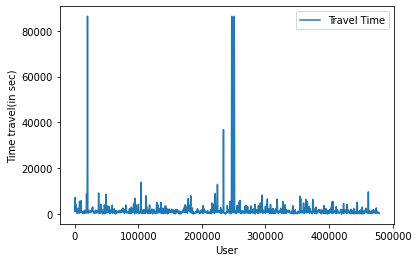

In [796]:
# plotting different travel time of different user
x = []
for i in range(len(difference_in_ride)):
  x.append(difference_in_ride[i].seconds)
for i in range(len(difference_in_ride)):
  difference_in_ride[i]=x[i]

y = [i for i in range(0,len(difference_in_ride),500)]
j=0
k = []
for i in range(0,len(difference_in_ride),500):
  if j < len(difference_in_ride):
    k.append(x[j]) 
    j = j+500
print(y)
print(k)

plt.plot(y, k, label='Travel Time')
plt.xlabel('User') 
plt.ylabel('Time travel(in sec)') 
plt.legend()
plt.show()

In [797]:
data['time_to_travel'] = difference_in_ride
data.head();

In [798]:
data9 = data[data['time_to_travel'] >= 120]
data9.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_to_travel
0,4479E04D9D45AC6B,docked_bike,2020-08-22 17:09:39,2020-08-22 17:30:02,10th St & L'Enfant Plaza SW,31287.0,13th & E St SE,31607.0,38.884323,-77.026010,38.882915,-76.987907,casual,1223
1,EF88DFBC1E6648EC,docked_bike,2020-08-26 13:13:54,2020-08-26 13:18:41,Constitution Ave & 2nd St NW/DOL,31271.0,New Jersey Ave & F St NW,31655.0,38.892275,-77.013917,38.897108,-77.011616,casual,287
2,25812556961CFABD,docked_bike,2020-08-07 16:34:41,2020-08-07 17:13:39,Friendship Hts Metro / Wisconsin Ave & Wiscons...,32014.0,22nd & P ST NW,31285.0,38.961763,-77.085998,38.909394,-77.048728,casual,2338
3,1621384E51D38F1F,docked_bike,2020-08-07 20:32:05,2020-08-07 20:45:58,John McCormack Rd NE,31528.0,3rd & M St NE,31627.0,38.938889,-76.997226,38.905470,-77.002130,casual,833
4,BC10B8C7848D1FDF,docked_bike,2020-08-18 13:40:34,2020-08-18 13:49:07,16th & Irving St NW,31122.0,New Hampshire Ave & T St NW,31229.0,38.928893,-77.036250,38.915544,-77.038252,member,513


In [799]:
data9['rideable_type'].value_counts()

docked_bike      234141
electric_bike    231737
Name: rideable_type, dtype: int64

In [800]:
import calendar
v = pd.Series([i for i in range(len(data1))])
data9 = data9.reindex(v)
s = pd.to_datetime(data1['ended_at'])

print(s)
print(s[0].month)
print(s[0].year)
print(s[0].day)
print(s[1].weekday())
print(calendar.day_name[s[1].weekday()])
m1 = []
m2 = []
m3 = []
m4 = []
v=0
for k in range(len(s)):
  m1.append(s[k].month)
for k in range(len(s)):
  m2.append(s[k].year)
for k in range(len(s)):
  m3.append(s[k].day)
#for k in range(len(s)):
 # if s[k] is not None:
  #  m4.append(calendar.day_name[s[k].weekday()])
  #else :
   # m4.append([s[0].weekday()])


0        2020-08-26 20:36:16
1        2020-08-02 18:12:36
2        2020-08-11 19:16:30
3        2020-08-01 14:09:52
4        2020-08-21 19:49:17
                 ...        
251598   2020-08-22 17:27:39
251599   2020-08-19 12:27:17
251600   2020-08-25 11:42:48
251601   2020-08-14 18:00:46
251602   2020-08-28 16:46:34
Name: ended_at, Length: 251603, dtype: datetime64[ns]
8
2020
26
6
Sunday


In [801]:
dc = {'ride_id': data9['ride_id'], 'rideable_type': data9['rideable_type'], 'started_at': data9['started_at'], 'MO' : m1, 'YEAR':m2, 'DY':m3, 'start_station_id': data9['start_station_id'], 'end_station_name': data9['end_station_name'], 'end_station_id': data9['end_station_id'], 'time_to_travel': data9['time_to_travel'] } 
df = pd.DataFrame(dc)
df 

,ride_id,rideable_type,started_at,MO,YEAR,DY,start_station_id,end_station_name,end_station_id,time_to_travel
0,4479E04D9D45AC6B,docked_bike,2020-08-22 17:09:39,8,2020,26,31287.0,13th & E St SE,31607.0,1223
1,EF88DFBC1E6648EC,docked_bike,2020-08-26 13:13:54,8,2020,2,31271.0,New Jersey Ave & F St NW,31655.0,287
2,25812556961CFABD,docked_bike,2020-08-07 16:34:41,8,2020,11,32014.0,22nd & P ST NW,31285.0,2338
3,1621384E51D38F1F,docked_bike,2020-08-07 20:32:05,8,2020,1,31528.0,3rd & M St NE,31627.0,833
4,BC10B8C7848D1FDF,docked_bike,2020-08-18 13:40:34,8,2020,21,31122.0,New Hampshire Ave & T St NW,31229.0,513
...,...,...,...,...,...,...,...,...,...,...
251598,AA052EB2F6361DDB,docked_bike,2020-10-27 13:53:17,8,2020,22,31506.0,11th & S St NW,31280.0,478
251599,C0F6AFB0F23029D0,docked_bike,2020-10-30 16:47:03,8,2020,19,31288.0,Henry Bacon Dr & Lincoln Memorial Circle NW,31289.0,2667
251600,2CAF1626BA51A5EC,docked_bike,2020-10-03 12:56:26,8,2020,25,31602.0,Edgewood Rec Center,31529.0,86395
251601,C7527C57BBBB2C5B,docked_bike,2020-10-23 11:37:46,8,2020,14,31238.0,14th & D St NW / Ronald Reagan Building,31231.0,86347


In [802]:
result = pd.merge(df, temp, how='left', on=['DY', 'MO','YEAR'])
result


,ride_id,rideable_type,started_at,MO,YEAR,DY,start_station_id,end_station_name,end_station_id,time_to_travel,LAT,LON,PRECTOT,QV2M,RH2M,PS,T2M_RANGE,T2M_MAX,T2M_MIN,T2MDEW,T2M,WS50M_RANGE
0,4479E04D9D45AC6B,docked_bike,2020-08-22 17:09:39,8,2020,26,31287.0,13th & E St SE,31607.0,1223,38.88481,-77.00609,0.04,13.29,69.37,100.53,11.61,30.09,18.48,18.61,24.47,3.54
1,EF88DFBC1E6648EC,docked_bike,2020-08-26 13:13:54,8,2020,2,31271.0,New Jersey Ave & F St NW,31655.0,287,38.88481,-77.00609,2.01,15.99,64.55,100.21,11.56,34.91,23.35,21.56,28.76,4.67
2,25812556961CFABD,docked_bike,2020-08-07 16:34:41,8,2020,11,32014.0,22nd & P ST NW,31285.0,2338,38.88481,-77.00609,3.19,16.48,74.50,100.41,11.00,32.45,21.45,22.04,26.85,3.85
3,1621384E51D38F1F,docked_bike,2020-08-07 20:32:05,8,2020,1,31528.0,3rd & M St NE,31627.0,833,38.88481,-77.00609,0.79,16.02,71.38,100.29,10.49,32.45,21.97,21.57,27.07,4.17
4,BC10B8C7848D1FDF,docked_bike,2020-08-18 13:40:34,8,2020,21,31122.0,New Hampshire Ave & T St NW,31229.0,513,38.88481,-77.00609,0.74,15.06,85.52,100.52,6.42,26.45,20.03,20.51,23.05,2.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251598,AA052EB2F6361DDB,docked_bike,2020-10-27 13:53:17,8,2020,22,31506.0,11th & S St NW,31280.0,478,38.88481,-77.00609,2.13,15.86,83.04,100.50,8.05,29.19,21.14,21.36,24.40,3.61
251599,C0F6AFB0F23029D0,docked_bike,2020-10-30 16:47:03,8,2020,19,31288.0,Henry Bacon Dr & Lincoln Memorial Circle NW,31289.0,2667,38.88481,-77.00609,4.52,12.76,74.36,100.37,9.10,27.56,18.46,17.91,22.62,3.72
251600,2CAF1626BA51A5EC,docked_bike,2020-10-03 12:56:26,8,2020,25,31602.0,Edgewood Rec Center,31529.0,86395,38.88481,-77.00609,2.37,16.36,76.17,100.31,11.06,32.19,21.14,21.89,26.33,2.98
251601,C7527C57BBBB2C5B,docked_bike,2020-10-23 11:37:46,8,2020,14,31238.0,14th & D St NW / Ronald Reagan Building,31231.0,86347,38.88481,-77.00609,7.17,16.98,85.78,100.48,6.77,28.99,22.22,22.45,24.98,0.88


In [803]:
s1 = result.query('start_station_id == 31131')
s1 = s1.sort_values(by=['DY'])
s1.head()

,ride_id,rideable_type,started_at,MO,YEAR,DY,start_station_id,end_station_name,end_station_id,time_to_travel,LAT,LON,PRECTOT,QV2M,RH2M,PS,T2M_RANGE,T2M_MAX,T2M_MIN,T2MDEW,T2M,WS50M_RANGE
251328,0CA8BEAD7EE1446A,docked_bike,2020-10-15 18:34:40,8,2020,1,31131.0,18th & New Hampshire Ave NW,31324.0,736,38.88481,-77.00609,0.79,16.02,71.38,100.29,10.49,32.45,21.97,21.57,27.07,4.17
116217,FCD87632A3FFDA73,docked_bike,2020-09-04 17:11:31,8,2020,1,31131.0,14th & Otis Pl NW,31131.0,261,38.88481,-77.00609,0.79,16.02,71.38,100.29,10.49,32.45,21.97,21.57,27.07,4.17
78451,C960C0DF6AF006D7,electric_bike,2020-08-15 15:36:49,8,2020,1,31131.0,Massachusetts Ave & Dupont Circle NW,31200.0,693,38.88481,-77.00609,0.79,16.02,71.38,100.29,10.49,32.45,21.97,21.57,27.07,4.17
46706,CDB50FDF86964537,docked_bike,2020-08-11 19:40:34,8,2020,1,31131.0,14th & Belmont St NW,31119.0,420,38.88481,-77.00609,0.79,16.02,71.38,100.29,10.49,32.45,21.97,21.57,27.07,4.17
100073,252AB935154FC635,docked_bike,2020-09-14 17:13:51,8,2020,1,31131.0,14th & Otis Pl NW,31131.0,2430,38.88481,-77.00609,0.79,16.02,71.38,100.29,10.49,32.45,21.97,21.57,27.07,4.17


In [804]:
s6 =s1.groupby(["rideable_type","DY"])
s6

In [805]:
s4 = temp.query('YEAR == 2020 and MO == 4')
s4 = s4.sort_values(by=['MO'])
s4.head()

,LAT,LON,YEAR,MO,DY,PRECTOT,QV2M,RH2M,PS,T2M_RANGE,T2M_MAX,T2M_MIN,T2MDEW,T2M,WS50M_RANGE
1917,38.88481,-77.00609,2020,4,1,0.68,5.14,76.67,100.00,8.51,12.53,4.01,4.20,8.02,3.69
1944,38.88481,-77.00609,2020,4,28,0.55,6.28,77.54,101.10,9.14,15.40,6.25,7.22,10.96,4.05
1943,38.88481,-77.00609,2020,4,27,1.12,5.39,72.23,100.64,9.56,15.10,5.54,4.97,9.68,4.03
1942,38.88481,-77.00609,2020,4,26,11.27,7.75,90.66,99.82,6.22,14.69,8.47,10.09,11.59,5.19
1941,38.88481,-77.00609,2020,4,25,3.82,7.28,83.55,100.59,8.58,16.52,7.94,9.30,11.99,4.42


In [806]:
sa =s1.groupby(["DY","MO","PS","T2M_RANGE","T2M_MAX","T2M_MIN","RH2M","rideable_type"]).size()
s5 = []
s6 = []
sa = pd.DataFrame(sa,columns=['count'])
modified = sa.reset_index()
a = 0
for i in range(len(modified)):
  if(modified['rideable_type'][i] == 'docked_bike'):
    s5.append(modified['count'][i])
    s6.append(a)
  else:
    s6.append(modified['count'][i])
    s5.append(a)
print(s6)
print(s5)
modified['docked_b'] = s5
modified['electric_b'] = s6
modified

[0, 14, 0, 0, 18, 0, 10, 0, 6, 0, 17, 0, 9, 0, 12, 0, 9, 0, 12, 0, 9, 0, 11, 0, 7, 0, 6, 0, 10, 0, 17, 0, 12, 0, 7, 0, 9, 0, 8, 0, 6, 0, 8, 0, 21, 0, 17, 0, 10, 0, 12, 0, 15, 0, 17, 0, 14, 0, 13, 0, 22, 0, 7]
[15, 0, 1, 18, 0, 7, 0, 8, 0, 15, 0, 9, 0, 10, 0, 16, 0, 22, 0, 5, 0, 14, 0, 8, 0, 10, 0, 17, 0, 15, 0, 15, 0, 12, 0, 9, 0, 7, 0, 10, 0, 14, 0, 25, 0, 21, 0, 6, 0, 11, 0, 16, 0, 18, 0, 14, 0, 11, 0, 20, 0, 5, 0]


,DY,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M,rideable_type,count,docked_b,electric_b
0,1,8,100.29,10.49,32.45,21.97,71.38,docked_bike,15,15,0
1,1,8,100.29,10.49,32.45,21.97,71.38,electric_bike,14,0,14
2,1,9,100.68,7.61,26.50,18.89,90.53,docked_bike,1,1,0
3,2,8,100.21,11.56,34.91,23.35,64.55,docked_bike,18,18,0
4,2,8,100.21,11.56,34.91,23.35,64.55,electric_bike,18,0,18
...,...,...,...,...,...,...,...,...,...,...,...
58,29,8,99.37,7.90,29.25,21.35,87.34,electric_bike,13,0,13
59,30,8,100.00,10.58,27.55,16.97,64.46,docked_bike,20,20,0
60,30,8,100.00,10.58,27.55,16.97,64.46,electric_bike,22,0,22
61,31,8,100.63,5.06,23.49,18.43,85.73,docked_bike,5,5,0


In [807]:
sa =s1.groupby(["DY","MO","PS","T2M_RANGE","T2M_MAX","T2M_MIN","RH2M","rideable_type","LAT","LON"]).size()
s5 = []
s6 = []
sa = pd.DataFrame(sa,columns=['count'])
modified = sa.reset_index()
a = 0
for i in range(len(modified)):
  if(modified['rideable_type'][i] == 'docked_bike'):
    s5.append(modified['count'][i])
    s6.append(a)
  else:
    s6.append(modified['count'][i])
    s5.append(a)
print(s6)
print(s5)
modified['docked_b'] = s5
modified['electric_b'] = s6
modified

[0, 14, 0, 0, 18, 0, 10, 0, 6, 0, 17, 0, 9, 0, 12, 0, 9, 0, 12, 0, 9, 0, 11, 0, 7, 0, 6, 0, 10, 0, 17, 0, 12, 0, 7, 0, 9, 0, 8, 0, 6, 0, 8, 0, 21, 0, 17, 0, 10, 0, 12, 0, 15, 0, 17, 0, 14, 0, 13, 0, 22, 0, 7]
[15, 0, 1, 18, 0, 7, 0, 8, 0, 15, 0, 9, 0, 10, 0, 16, 0, 22, 0, 5, 0, 14, 0, 8, 0, 10, 0, 17, 0, 15, 0, 15, 0, 12, 0, 9, 0, 7, 0, 10, 0, 14, 0, 25, 0, 21, 0, 6, 0, 11, 0, 16, 0, 18, 0, 14, 0, 11, 0, 20, 0, 5, 0]


,DY,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M,rideable_type,LAT,LON,count,docked_b,electric_b
0,1,8,100.29,10.49,32.45,21.97,71.38,docked_bike,38.88481,-77.00609,15,15,0
1,1,8,100.29,10.49,32.45,21.97,71.38,electric_bike,38.88481,-77.00609,14,0,14
2,1,9,100.68,7.61,26.50,18.89,90.53,docked_bike,38.88481,-77.00609,1,1,0
3,2,8,100.21,11.56,34.91,23.35,64.55,docked_bike,38.88481,-77.00609,18,18,0
4,2,8,100.21,11.56,34.91,23.35,64.55,electric_bike,38.88481,-77.00609,18,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,29,8,99.37,7.90,29.25,21.35,87.34,electric_bike,38.88481,-77.00609,13,0,13
59,30,8,100.00,10.58,27.55,16.97,64.46,docked_bike,38.88481,-77.00609,20,20,0
60,30,8,100.00,10.58,27.55,16.97,64.46,electric_bike,38.88481,-77.00609,22,0,22
61,31,8,100.63,5.06,23.49,18.43,85.73,docked_bike,38.88481,-77.00609,5,5,0


In [808]:
aggregation_functions = { 'DY': 'first','docked_b': 'sum', 'electric_b': 'sum','count':'sum'}
df_new = modified.groupby(["DY"]).aggregate(aggregation_functions)
df_new['MO'] = modified['MO']
df_new['PS'] = modified['PS']
df_new['T2M_RANGE'] = modified['T2M_RANGE']
df_new['T2M_MAX'] = modified['T2M_MAX']
df_new['T2M_MIN'] = modified['T2M_MIN']
df_new['RH2M'] = modified['RH2M']
modified = df_new
modified

,DY,docked_b,electric_b,count,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M
DY,,,,,,,,,,
1,1,16,14,30,8,100.29,10.49,32.45,21.97,71.38
2,2,18,18,36,9,100.68,7.61,26.50,18.89,90.53
3,3,7,10,17,8,100.21,11.56,34.91,23.35,64.55
4,4,8,6,14,8,100.21,11.56,34.91,23.35,64.55
5,5,15,17,32,8,100.66,8.73,30.86,22.14,75.05
6,6,9,9,18,8,100.66,8.73,30.86,22.14,75.05
7,7,10,12,22,8,100.03,8.87,30.34,21.47,79.56
8,8,16,9,25,8,100.03,8.87,30.34,21.47,79.56
9,9,22,12,34,8,100.69,10.48,30.07,19.60,69.00


In [809]:
modified.corr()

,DY,docked_b,electric_b,count,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M
DY,1.000000,0.078878,0.193886,0.141155,-0.285774,0.103502,-0.450636,-0.411414,0.014406,0.439748
docked_b,0.078878,1.000000,0.746476,0.944494,0.177110,0.023806,-0.091114,-0.118277,-0.080398,0.222040
electric_b,0.193886,0.746476,1.000000,0.923649,0.258926,-0.038592,-0.271903,-0.274216,-0.051595,0.330797
count,0.141155,0.944494,0.923649,1.000000,0.229843,-0.005343,-0.186721,-0.203508,-0.071778,0.291204
MO,-0.285774,0.177110,0.258926,0.229843,1.000000,0.075303,-0.058225,-0.235362,-0.433146,0.299903
PS,0.103502,0.023806,-0.038592,-0.005343,0.075303,1.000000,-0.065900,-0.146473,-0.204397,0.126554
T2M_RANGE,-0.450636,-0.091114,-0.271903,-0.186721,-0.058225,-0.065900,1.000000,0.907909,-0.045109,-0.900538
T2M_MAX,-0.411414,-0.118277,-0.274216,-0.203508,-0.235362,-0.146473,0.907909,1.000000,0.377781,-0.846304
T2M_MIN,0.014406,-0.080398,-0.051595,-0.071778,-0.433146,-0.204397,-0.045109,0.377781,1.000000,-0.028836
RH2M,0.439748,0.222040,0.330797,0.291204,0.299903,0.126554,-0.900538,-0.846304,-0.028836,1.000000


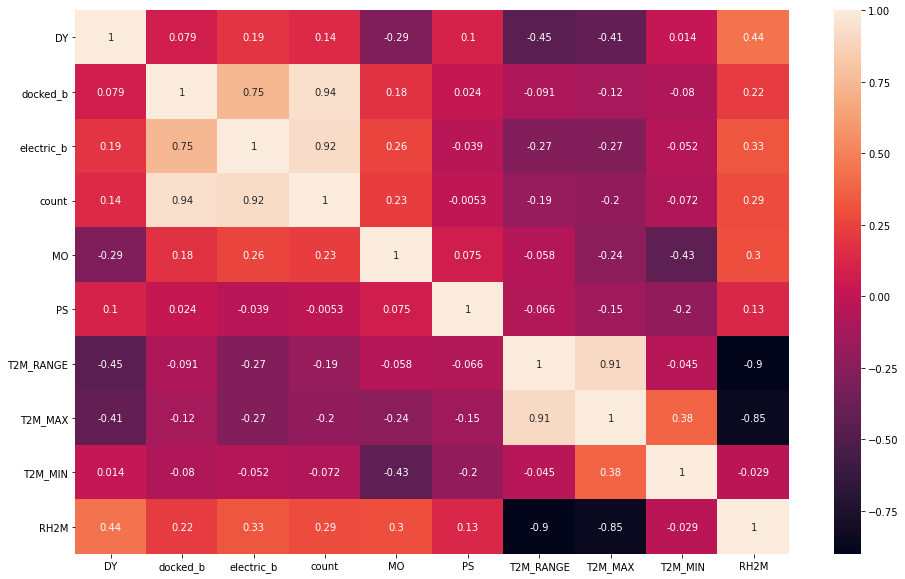

In [810]:
plt.figure(figsize=(16,10))
sns.heatmap(modified.corr(), annot=True)
plt.show()

In [811]:
docked_count = modified['docked_b'].sum()
print (docked_count)
electric_count = modified['electric_b'].sum()
print (electric_count)


404
365


In [812]:
from sklearn.svm import SVC
!pip3 install quandl
!pip3 install sklearn
import quandl, math
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression

X = np.array(modified.drop(['count','docked_b','electric_b'], 1))
y = np.array(modified['docked_b'])
svclassifier = SVC(kernel='poly', degree=8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
svclassifier.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [813]:
y_pred = svclassifier.predict(X_test)


In [814]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

           6       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       1.0
          14       0.00      0.00      0.00       1.0
          16       0.00      0.00      0.00       1.0
          18       0.00      0.00      0.00       1.0
          21       0.00      0.00      0.00       1.0
          25       0.00      0.00      0.00       0.0

    accuracy                           0.00       7.0
   macro avg       0.00      0.00      0.00       7.0
weighted avg       0.00      0.00      0.00       7.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [815]:
print(y_pred)
print(y_test)

[25 14 14 25  7 25 10]
[ 6  8 18 14 10 21 16]


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


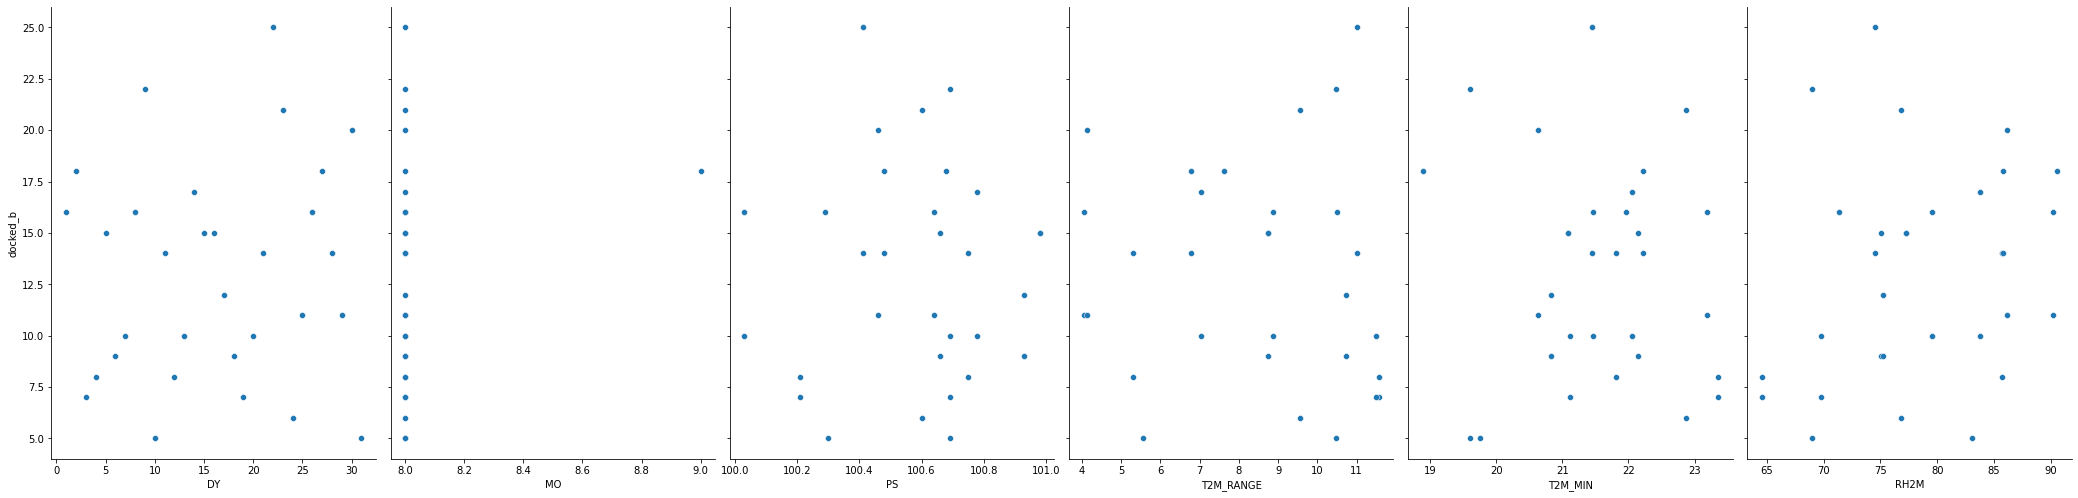

In [816]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(modified, x_vars=['DY','MO','PS','T2M_RANGE','T2M_MIN','RH2M'], y_vars='docked_b', size=7, aspect=0.7)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


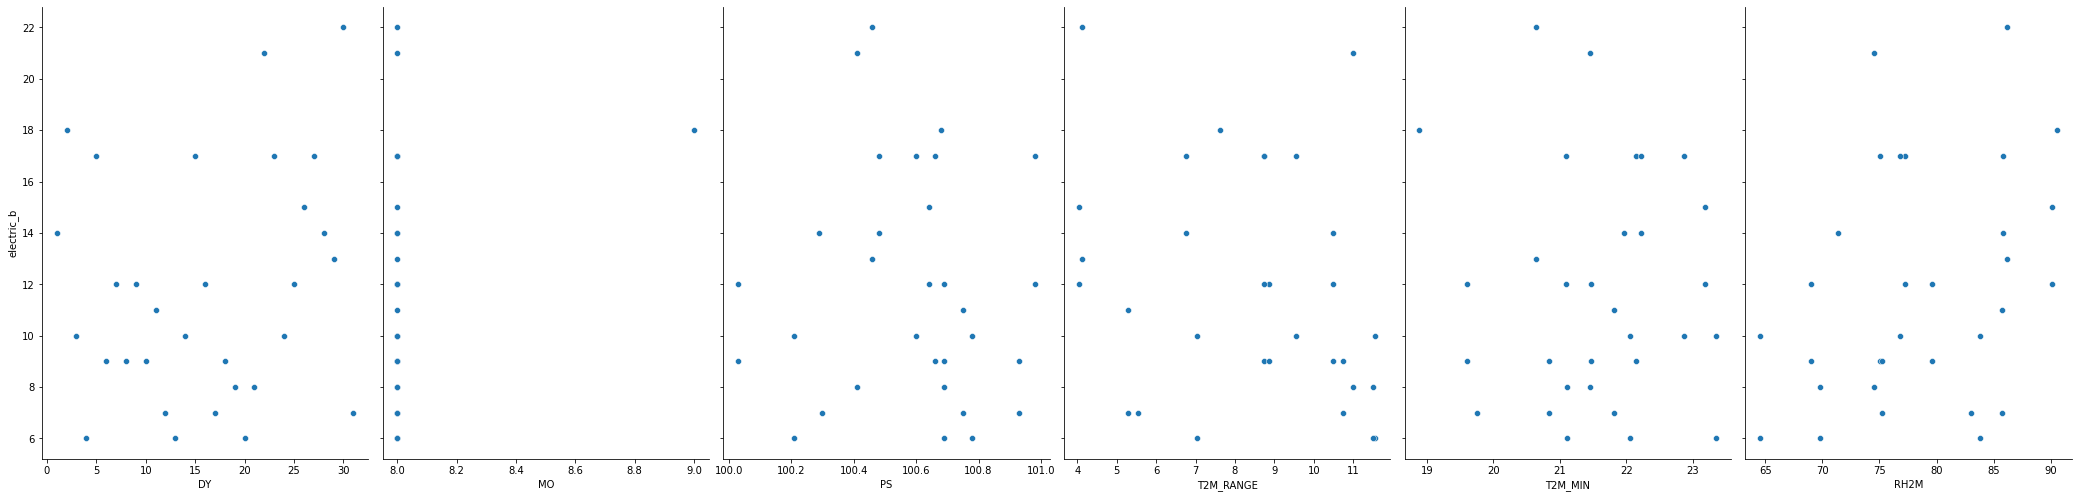

In [817]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(modified, x_vars=['DY','MO','PS','T2M_RANGE','T2M_MIN','RH2M'], y_vars='electric_b', size=7, aspect=0.7)

In [818]:

X = np.array(modified.drop(['PS','docked_b','count'], 1))
y = np.array(modified['docked_b'])

In [819]:
X = preprocessing.scale(X)

In [820]:
y = np.array(modified['docked_b'])

In [821]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [822]:
clf = LinearRegression()

In [823]:
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
y_pred


array([11.36203519,  7.43491965, 11.01416751, 10.01116262, 10.28647762,
        8.01922223, 21.56639756])

In [824]:
y_test

array([16,  9,  7, 10,  5,  8, 20])

In [825]:
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.5888977243829674


In [826]:
#To retrieve the intercept:
print(clf.intercept_)

#For retrieving the slope:
print(clf.coef_)

13.183689754125009
[-1.45661417e-01  4.56906883e+00 -1.07025759e+00 -7.33100875e+02
  7.91653266e+02 -3.33152028e+02  2.06351734e-01]


In [827]:
df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df2


,Actual,Predicted
0,16,11.362035
1,9,7.434920
2,7,11.014168
3,10,10.011163
4,5,10.286478
5,8,8.019222
6,20,21.566398


In [828]:
y_test1 = y_test
y_pred1 = y_pred

In [829]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_test1, y_pred1)
mse1

10.067810831437535

In [830]:
X = np.array(modified.drop(['PS','electric_b','count'], 1))
y = np.array(modified['electric_b'])

In [831]:
#X = preprocessing.scale(X)
y = np.array(modified['electric_b'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearRegression()

In [832]:
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)


0.44174186851363073


In [833]:
U=clf.predict(X_test)
U

array([ 6.9967857 , 14.9538647 , 10.14090966, 12.53219501, 14.26638277,
       12.37198641, 16.19051573])

In [834]:
y_test

array([ 8, 14,  7,  9, 14, 18, 15])

In [835]:
clf.score(X_test,y_test)

0.44174186851363073

In [836]:
y_test2 = y_test
y_pred2 = U

In [837]:
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(y_test2, y_pred2)
mse2

8.202976625922162

In [838]:
ls = []
mse_list = []
for i in range(0,30):
  u = (i)%31
  v = (26+i)%31
  if v >= 26:
    x = modified[u:v]
    y = modified[v:]
    z = modified[:u]
    y = y.append(z)
  else:
    x = modified[v:u]
    y = modified[u:]
    z = modified[:v]
    y = y.append(z)
  y = pd.DataFrame(y)
  x = pd.DataFrame(x)
  X_train = np.array(x.drop(['PS','docked_b','count'], 1))
  y_train = np.array(x['docked_b'])
  X_test = np.array(y.drop(['PS','docked_b','count'], 1))
  y_test = np.array(y['docked_b'])
  clf = LinearRegression()
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  confidence = clf.score(X_test, y_test)
  mse_reg = mean_squared_error(y_test, y_pred)
  ls.append(confidence)
  mse_list.append(mse_reg)
mean_regression_d = np.mean(ls)
max_reg_d = np.max(ls)
mean_mse_reg_d = np.mean(mse_reg)
mean_regression_d

0.6840322089350314

In [839]:
ls = []
for i in range(0,30):
  u = (i)%31
  v = (26+i)%31
  if v >= 26:
    x = modified[u:v]
    y = modified[v:]
    z = modified[:u]
    y = y.append(z)
  else:
    x = modified[v:u]
    y = modified[u:]
    z = modified[:v]
    y = y.append(z)
  y = pd.DataFrame(y)
  x = pd.DataFrame(x)
  X_train = np.array(x.drop(['PS','electric_b','count'], 1))
  y_train = np.array(x['electric_b'])
  X_test = np.array(y.drop(['PS','electric_b','count'], 1))
  y_test = np.array(y['electric_b'])
  clf = LinearRegression()
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  confidence = clf.score(X_test, y_test)
  mse_reg = mean_squared_error(y_test, y_pred)
  ls.append(confidence)
  mse_list.append(mse_reg)
mean_regression_e = np.mean(ls)
max_reg_e = np.max(ls)
mean_mse_reg_e = np.mean(mse_reg)
print(mean_regression_e)

0.6610074603471698


In [840]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
ls = []
for i in range(0,15):
  u = (i)%31
  v = (26+i)%31
  if v >= 26:
    x = modified[u:v]
    y = modified[v:]
    z = modified[:u]
    y = y.append(z)
  else:
    x = modified[v:u]
    y = modified[u:]
    z = modified[:v]
    y = y.append(z)
  y = pd.DataFrame(y)
  x = pd.DataFrame(x)
  X_train = np.array(x.drop(['PS','docked_b','count'], 1))
  y_train = np.array(x['docked_b'])
  X_test = np.array(y.drop(['PS','docked_b','count'], 1))
  y_test = np.array(y['docked_b'])
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  regressor = RandomForestRegressor(n_estimators=10, random_state=20)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  confidence = regressor.score(X_test, y_test)
  mse_reg = mean_squared_error(y_test, y_pred)
  ls.append(confidence)
  mse_list.append(mse_reg)
Random_forest_max_d = np.max(ls)
Random_forest_mean_d = np.mean(ls)
mean_mse_rand_d = np.mean(mse_reg)
Random_forest_mean_d

0.6716335102748

In [841]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
ls = []
for i in range(0,30):
  u = (i)%31
  v = (26+i)%31
  if v >= 26:
    x = modified[u:v]
    y = modified[v:]
    z = modified[:u]
    y = y.append(z)
  else:
    x = modified[v:u]
    y = modified[u:]
    z = modified[:v]
    y = y.append(z)
  y = pd.DataFrame(y)
  x = pd.DataFrame(x)
  X_train = np.array(x.drop(['PS','electric_b','count'], 1))
  y_train = np.array(x['electric_b'])
  X_test = np.array(y.drop(['PS','electric_b','count'], 1))
  y_test = np.array(y['electric_b'])
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  regressor = RandomForestRegressor(n_estimators=10, random_state=20)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  mse_reg = mean_squared_error(y_test, y_pred)
  confidence = regressor.score(X_test, y_test)
  ls.append(confidence)
  mse_list.append(mse_reg)
Random_forest_max_e = np.max(ls)
Random_regression_e = np.mean(ls)
mean_mse_forest_e = np.mean(mse_reg)
Random_regression_e

0.649678947368421

***Results -------------------//////***




In [842]:
#linear regression Electric bike
print("Actual and predicted value of Electric bike")
df1 = pd.DataFrame({'Actual': y_test1.flatten(), 'Predicted': y_pred1.flatten()})
df1

Actual and predicted value of Electric bike


,Actual,Predicted
0,16,11.362035
1,9,7.434920
2,7,11.014168
3,10,10.011163
4,5,10.286478
5,8,8.019222
6,20,21.566398


In [843]:
#linear regression Docked bike
print("Actual and predicted value of Docked bike")
df2 = pd.DataFrame({'Actual': y_test2.flatten(), 'Predicted': y_pred2.flatten()})
df2

Actual and predicted value of Docked bike


,Actual,Predicted
0,8,6.996786
1,14,14.953865
2,7,10.140910
3,9,12.532195
4,14,14.266383
5,18,12.371986
6,15,16.190516


In [844]:
from prettytable import PrettyTable
print('Accuracy of Docked and Electric (with cross validation) using Linear Regression')
t = PrettyTable(['Bike', 'Means Square Error'])
t.add_row(['Docked', mse1])
t.add_row(['Electric', mse2])
print(t)

Accuracy of Docked and Electric (with cross validation) using Linear Regression
+----------+--------------------+
|   Bike   | Means Square Error |
+----------+--------------------+
|  Docked  | 10.067810831437535 |
| Electric | 8.202976625922162  |
+----------+--------------------+


In [845]:
from prettytable import PrettyTable
print('Accuracy of Docked and Electric (with cross validation) using Linear Regression')
t = PrettyTable(['Bike','Avg. Mean Square Error','Max Accuracy', 'Accuracy'])
t.add_row(['Docked',mean_mse_reg_d,max_reg_d, mean_regression_d])
t.add_row(['Electric',mean_mse_reg_e,max_reg_e, mean_regression_e])
print(t)

Accuracy of Docked and Electric (with cross validation) using Linear Regression
+----------+------------------------+--------------------+--------------------+
|   Bike   | Avg. Mean Square Error |    Max Accuracy    |      Accuracy      |
+----------+------------------------+--------------------+--------------------+
|  Docked  |   109.91580985300067   | 0.8246901056785432 | 0.6840322089350314 |
| Electric |    46.8707925192216    | 0.8302879276997592 | 0.6610074603471698 |
+----------+------------------------+--------------------+--------------------+


In [846]:
from prettytable import PrettyTable
print('Accuracy of Docked and Electric (with cross validation) using Random Forest')
t = PrettyTable(['Bike','Avg. Mean Square Error','Max Accuracy', 'Mean Accuracy'])
t.add_row(['Docked',mean_mse_rand_d, Random_forest_max_d ,Random_forest_mean_d])
t.add_row(['Electric',mean_mse_forest_e, Random_forest_max_e, Random_regression_e])
print(t)

Accuracy of Docked and Electric (with cross validation) using Random Forest
+----------+------------------------+--------------------+-------------------+
|   Bike   | Avg. Mean Square Error |    Max Accuracy    |   Mean Accuracy   |
+----------+------------------------+--------------------+-------------------+
|  Docked  |   23.11884615384616    | 0.7066739606126915 |  0.6716335102748  |
| Electric |   27.918076923076924   |       0.7962       | 0.649678947368421 |
+----------+------------------------+--------------------+-------------------+
